# Diamond Price Prediction

## Goal
Training a Machine Learning algorithm that predicts the price of diamonds

## Data
The dataset contains data on 54 000 diamonds ([data source](https://www.kaggle.com/shivam2503/diamonds)).

For each diamond, we have its:
* price: price in US dollars (\\$326 - $18,823)
* carat: weight of the diamond (0.2 - 5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond color, from J (worst) to D (best)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0 - 10.74)
* y: width in mm (0 - 58.9)
* z: depth in mm (0 - 31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)
* table: width of top of diamond relative to widest point (43 - 95)

## Notes
In this project, I want to focus on modeling.
I will therefore not go to deep on data exploration & data cleaning.
I am conscious of the fact this step is crucial to get the best model, but here my goal is just to practice modeling.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi']= 300    # tells matplotlib to display inline plots at 300 DPI
mpl.rc("savefig", dpi = 300)       # tells matplotlib to save plots at 300 DPI
style.use("fivethirtyeight")
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

## General Exploration

In [96]:
data = pd.read_csv("diamonds.csv").drop(["Unnamed: 0"], axis=1)    # dropping a useless column
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* There are no missing values
* Columns seem to be of the appropriate type

## Cleaning Columns

### Numerical Columns 

In [98]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


x, y and z translate the volume of the diamond. A value of 0 for any of these 3 features does not make sense.

In [99]:
impossible_volume = data[(data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0)]
impossible_volume.shape[0]

20

Only 20 diamonds have impossible volumes (0.04%) so we can safely drop them.

In [100]:
data = data.drop(impossible_volume.index)

### Categorical Cols

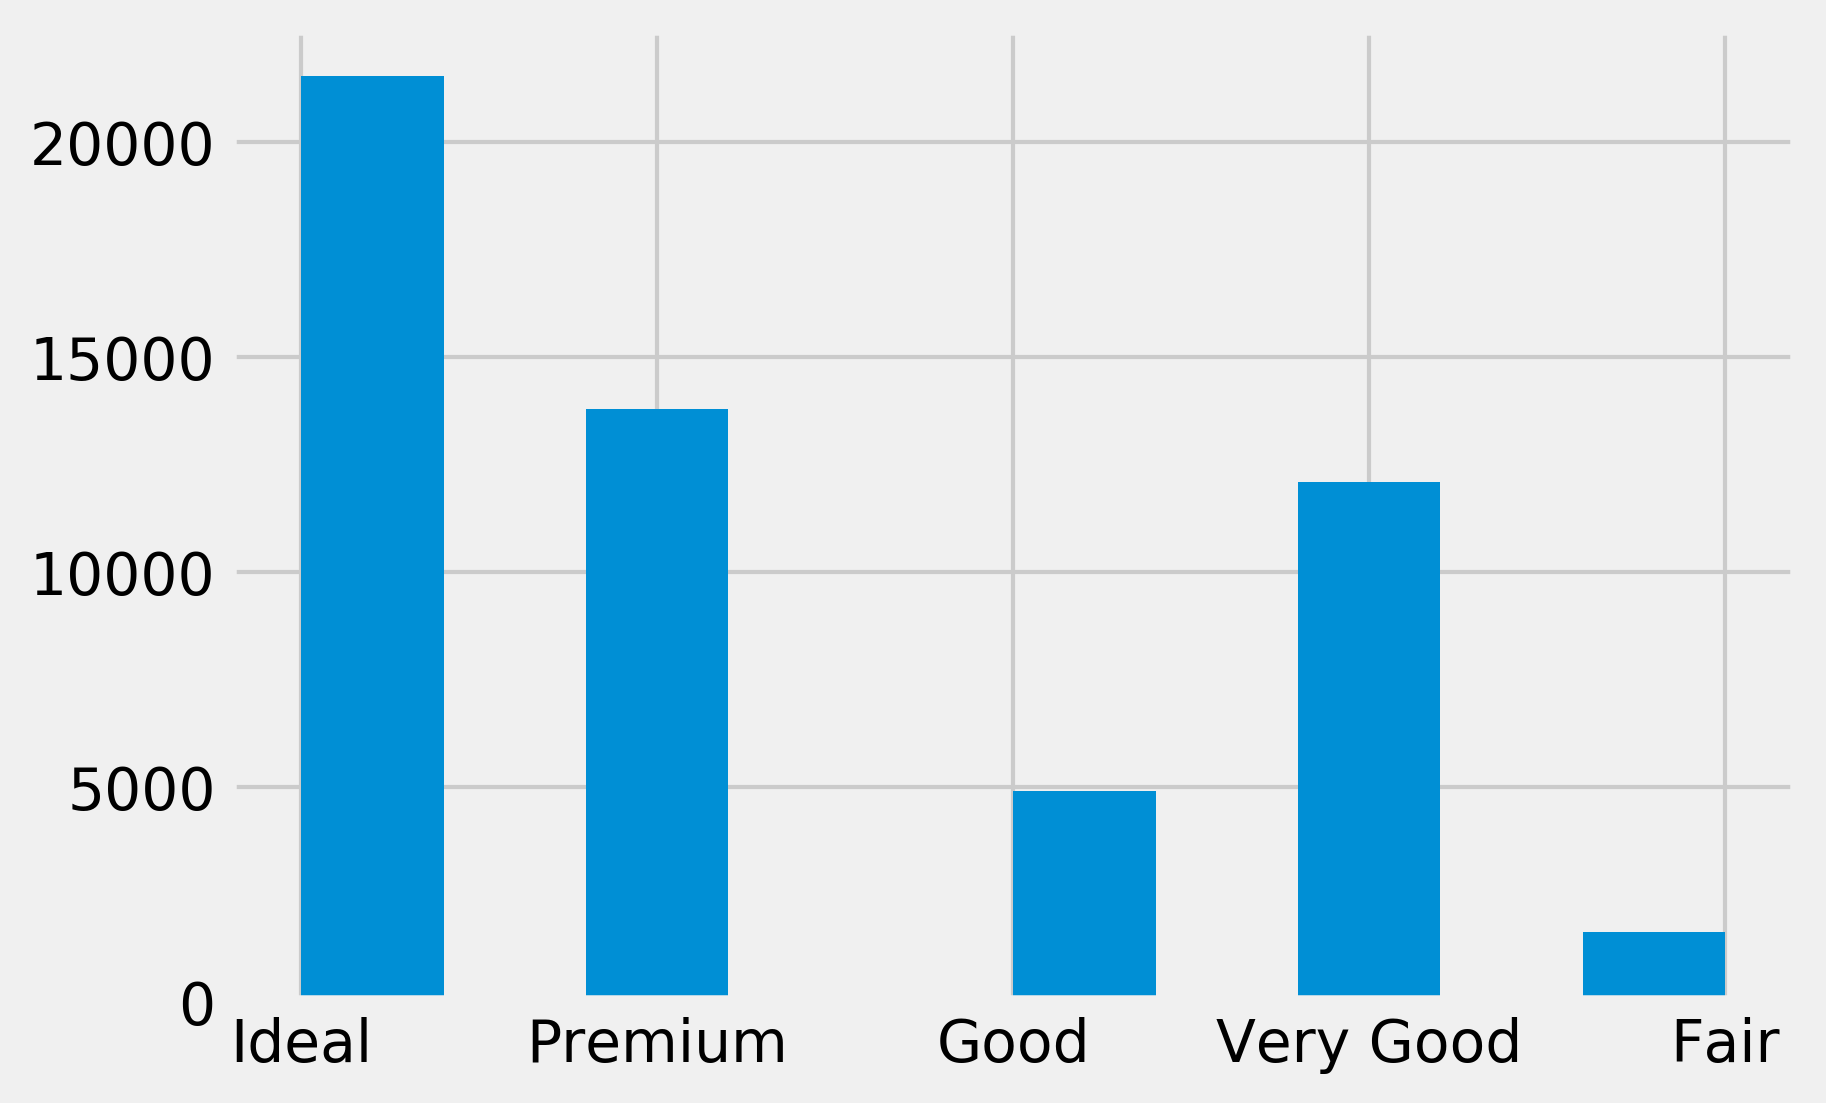

In [101]:
data["cut"].hist()

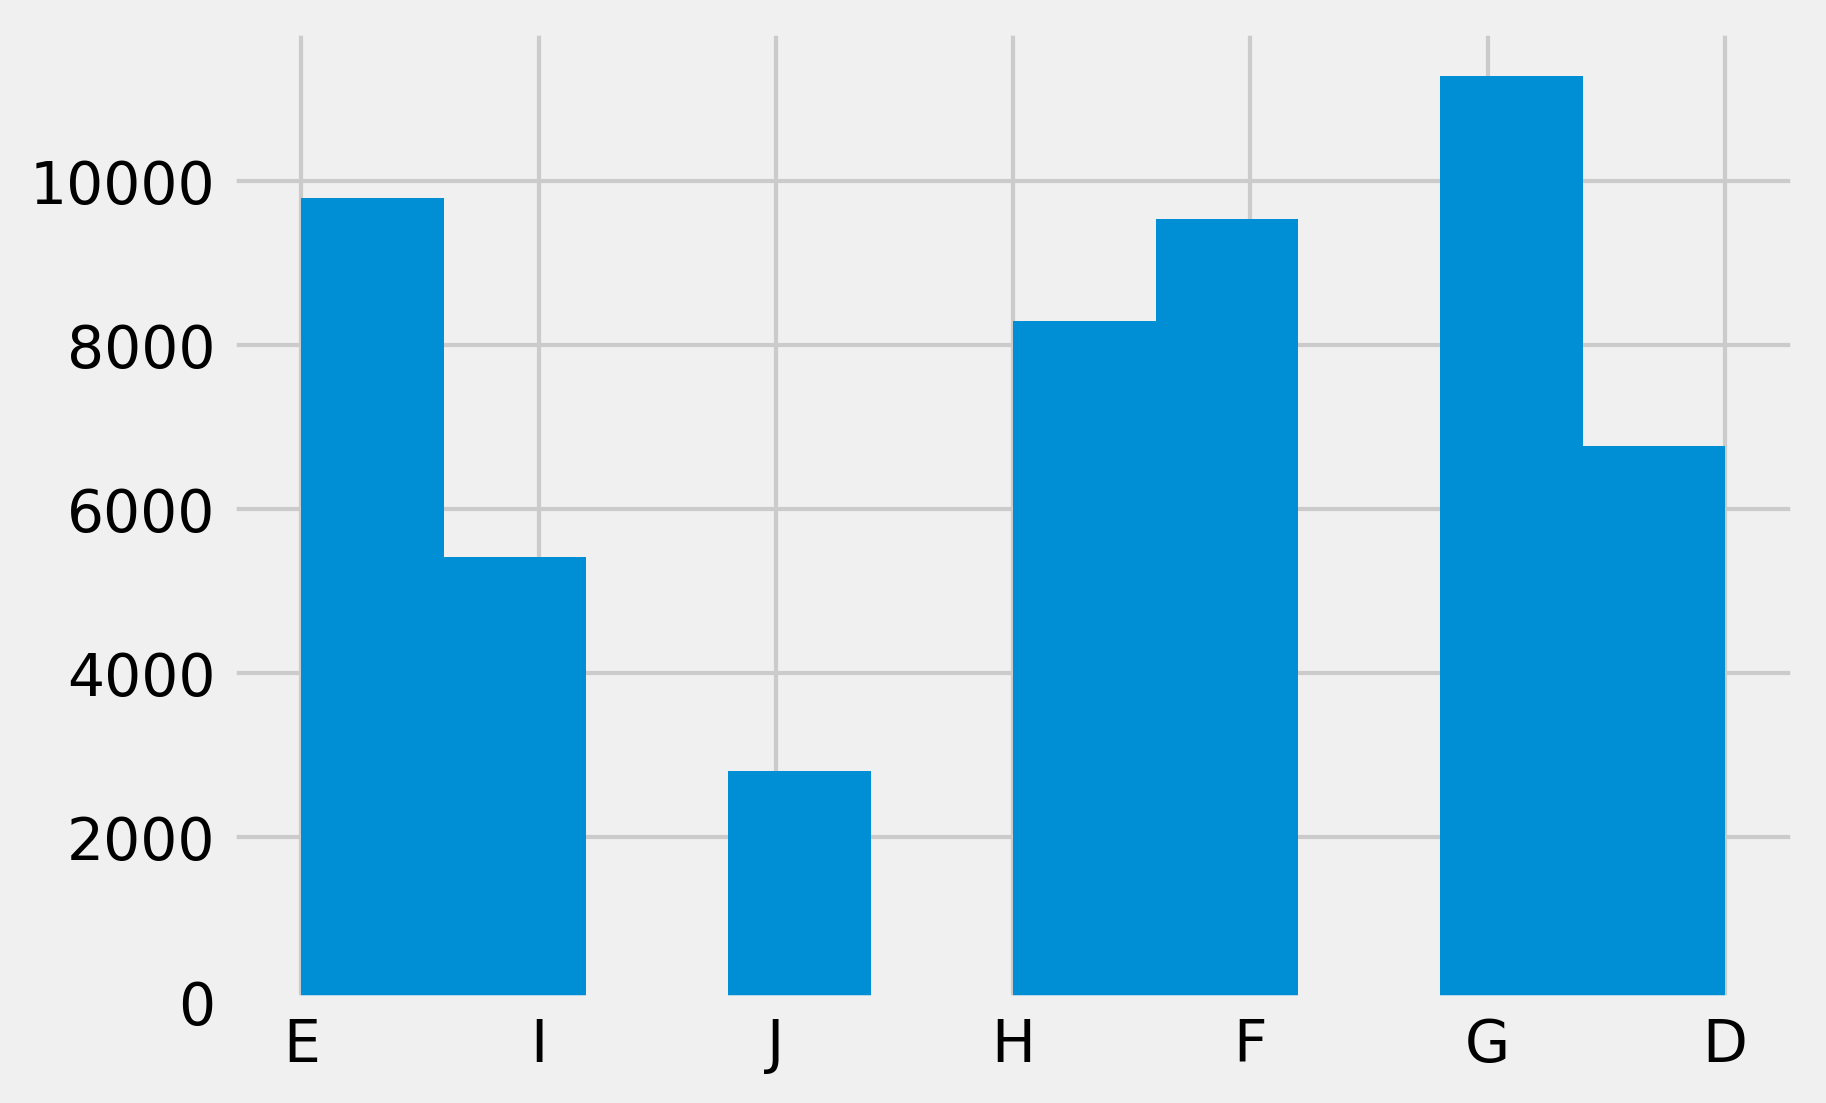

In [102]:
data["color"].hist()

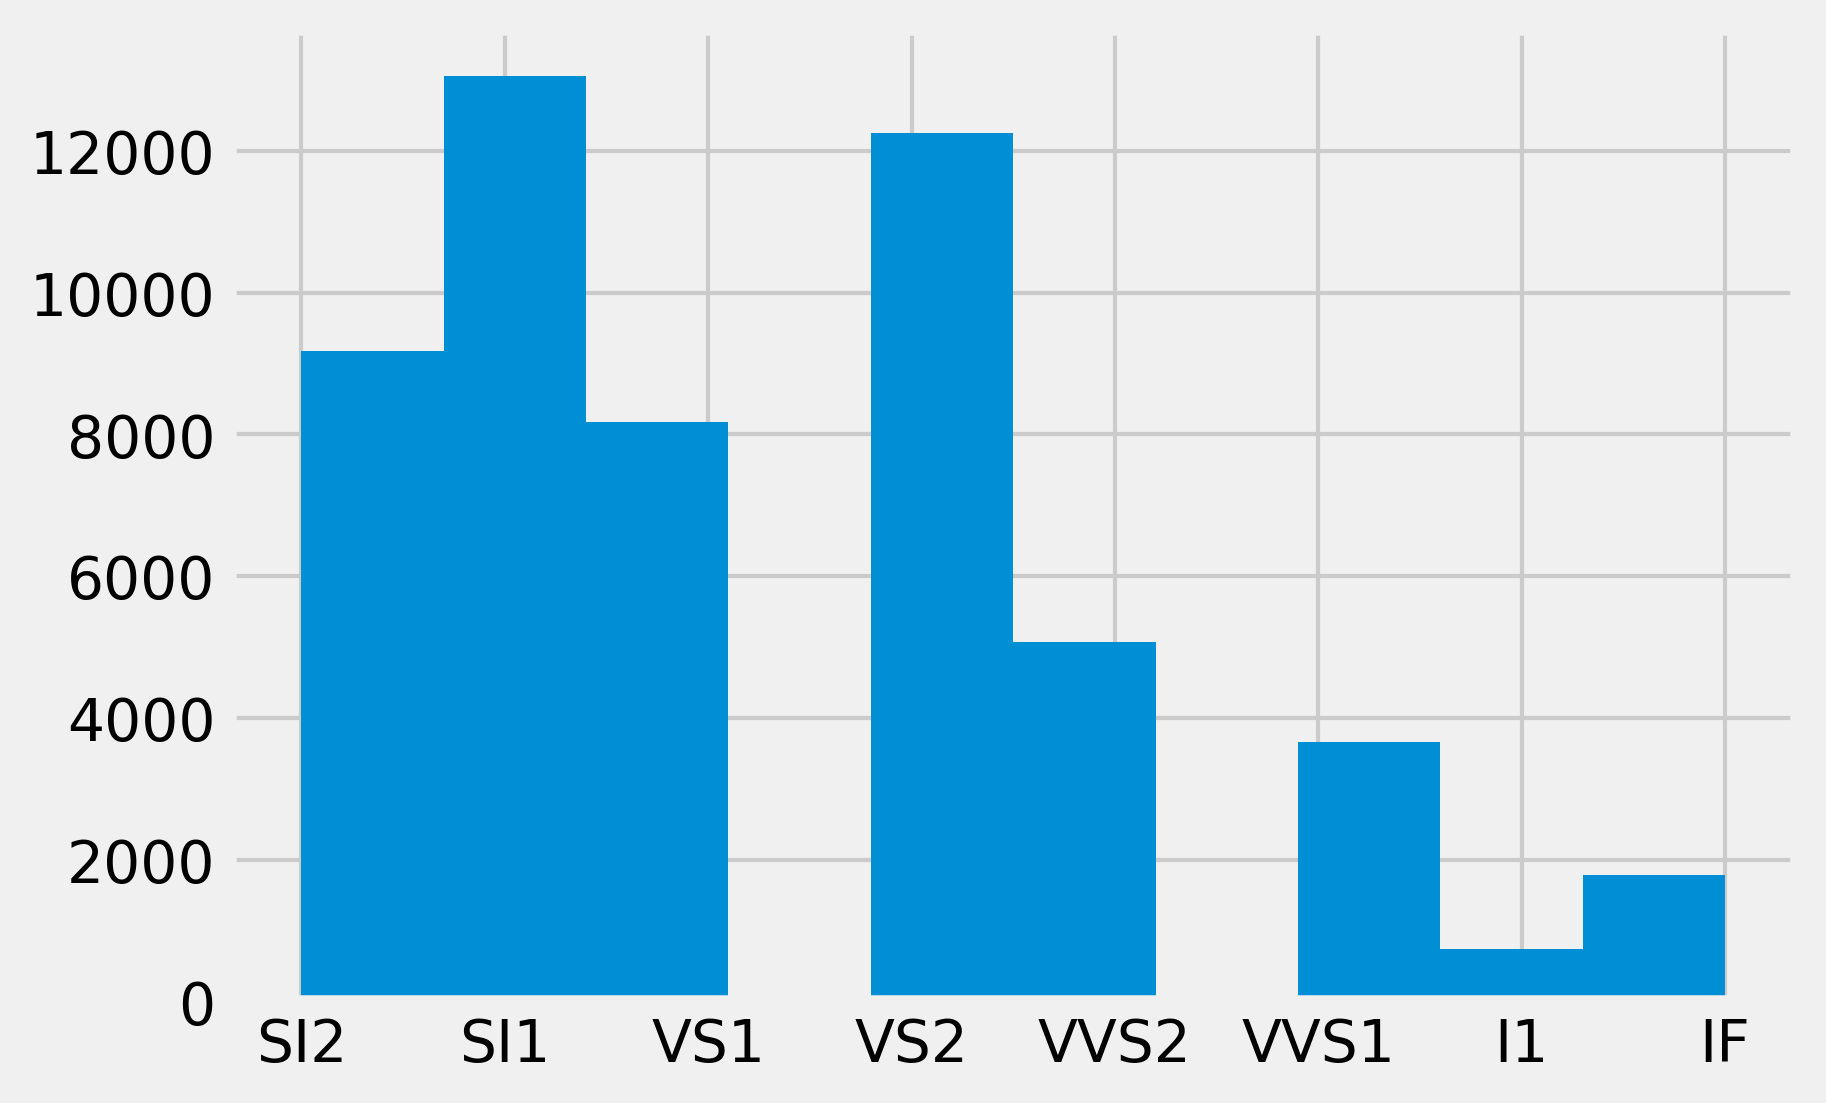

In [103]:
data["clarity"].hist()

We don't see anything clearly abnormal for any category. Each category has at least a few representations, and no category is too dominant.

## Converting categorical features to numeric features
Most machine learning algorithms can only work with numeric data.

We therefore have to convert our categorical features to numeric features. We will do so by splitting a category type into multiple columns (one for each category), and populating them with essentially boolean values (0 or 1) translating the presence or absence of this category.

In [104]:
data = pd.get_dummies(data)    # Generates all the "boolean" columns and concats them with our data. Also removes the old version of each category
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Feature Engineering
Feature Engineering is the act of creating new features from our current data.

We should not add the features x, y, and z separately to our model as they make more sense when taken together as the volume of the diamond.

In [105]:
data["volume"] = data["x"] * data["y"] * data["z"]
data = data.drop(["x", "y", "z"], axis=1)    # removes individual dimensions that we don't need anymore

## Data Scaling
The values range in a very different way from column to column.
We should rescale them to fit them better to our model.

In [106]:
# Selecting the numeric columns
numeric_data = data.select_dtypes(include=["int64", "float64"])
numeric_cols = numeric_data.drop(["price"], axis=1).columns    # we don't want to scale our target: price
numeric_cols

Index(['carat', 'depth', 'table', 'volume'], dtype='object')

In [15]:
# Scaling

from sklearn.preprocessing import minmax_scale

for col in numeric_cols:
    data[col] = minmax_scale(data[col])
    
data[numeric_cols].head()

,carat,depth,table,volume
0,0.006237,0.513889,0.230769,0.001705
1,0.002079,0.466667,0.346154,0.000735
2,0.006237,0.386111,0.423077,0.001672
3,0.018711,0.538889,0.288462,0.003943
4,0.022869,0.563889,0.288462,0.005306


## Feature Selection

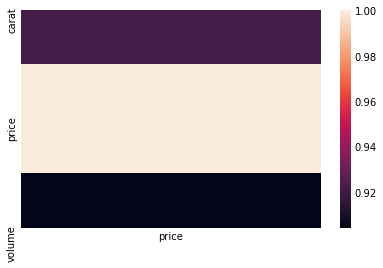

In [16]:
corr_matrix = data.corr()
correlated_with_price = corr_matrix[np.abs(corr_matrix["price"]) > .3]
sns.heatmap(correlated_with_price[["price"]])

## Reducing Collinearity
To reduce collinearity between our features, we should drop one category per category group.
We don't lose information by doing this as the value of a category can be retrieved by using the value for all other categories in the group.

For each category group, we will drop the category that contains the least variance, as low variance features tend to be ineffective.

In [17]:
# Return the name of the column of least variance
def find_col_of_least_variance(df):
    deviations = [df[col].std() for col in df.columns]
    min_deviation = np.min(deviations)
    return df.columns[deviations.index(min_deviation)]

# Returns a new DataFrame with the member of least variance of the category dropped
def drop_least_variance_member(df, category):
    members = [col for col in df.columns if col.startswith(category)]
    col_to_drop = find_col_of_least_variance(df[members])
    print("Dropping " + col_to_drop)
    return df.drop([col_to_drop], axis=1)

# Returns a new DataFrame with the member of least variance of each category dropped
def drop_least_variance_members(df, categories):
    for category in categories:
        df = drop_least_variance_member(df, category)
    return df

data_cleaned = drop_least_variance_members(data, ["cut", "color", "clarity"])

Dropping cut_Fair
Dropping color_J
Dropping clarity_I1


## Train/Test split

In [18]:
from sklearn.model_selection import train_test_split

target = "price"
X = data_cleaned.drop([target], axis=1)
y = data_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

## Feature Selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

def select_features(X_train, y_train, target): 
    lr = LinearRegression()
    selector = RFECV(lr, cv=10)
    selector.fit(X_train, y_train)
    
    best_columns = list(X_train.columns[selector.support_])    
    return best_columns


features = select_features(X_train, y_train, "price")
features

['carat',
 'depth',
 'table',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'volume']

## Validating with Cross-Validation
Cross-validating with 10 folds means that the model will be trained 10 times using 90% of the training data. The trained model then makes predictions on the 10% left and we compute the predictions' R².

At each training iteration, the data that is used as test data changes. The score that we get at the end is the mean of the 10 scores. By doing this, we reduce overfitting by testing our model on different permutations of the data.

In [20]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X_train[features], y_train, cv=10)
accuracy = scores.mean()
print(accuracy) # accuracy is measured as R²: coefficient of determination [0:1]

0.8965064444787526


## Predicting
Now that we validated our model, we can use it to make predictions on our test data.

In [21]:
lr.fit(X_train[features], y_train)
predictions = lr.predict(X_test[features])

## Error
How far are our predictions from reality?

We will measure our error with:
* R²: Coefficent of determination. It's the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, 1 being the best.
* MSE: Mean squared error. It measures the average of the squares of the errors. The closer it is to 0 the better.
* RMSE: Root mean squared error. It measures the standard deviation of the errors. The it is to 0 the better, and it's expressed in the target's unit, which here means it's expressed in $.


In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r_squarred = r2_score(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
print("R² score: " + str(r_squarred))
print("MSE:      " + str(mse))
print("RMSE:     " + str(rmse))

R² score: 0.9082249818261265
MSE:      1263702.4020779473
RMSE:     1124.145187276958


## Model Selection + Hyperparameter Optimization
In this section, we will do two steps simultaneously:
* Model selection: try different types of models to select the best one
* Hyperparameter optimization: try different parameters for each model to select the best one
At the end of this step we will have selected the best type of model with the best parameters.

To accomplish this, we will, for each model type, do a Grid Search. This function will perform a 10 folds cross validation for each combination of hyperparameters, allowing us to find the best hyerparameters. It measures the accuracy of a model using R².

n_jobs: -1 -> use all cores

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

def get_best_model(X_train, y_train, models): 
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(X_train, y_train)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

models = [
    {
        "name": "LinearRegression",
        "estimator": LinearRegression(),
        "hyperparameters":
            {
                "n_jobs": [-1]
            }
    },
    {
        "name": "KNeighborsRegressor",
        "estimator": KNeighborsRegressor(),
        "hyperparameters":
            {
                "n_neighbors": range(1, 20),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2],
                "n_jobs": [-1]
            }
    },
    {
        "name": "DecisionTreeRegressor",
        "estimator": DecisionTreeRegressor(),
        "hyperparameters":
        {
                "max_depth": [2, 5, 10, 20, 40, 80],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": range(1, 6),
                "min_samples_split": [2, 3, 4, 5, 8, 12, 16]
        }
    },
    {
        "name": "RandomForestRegressor",
        "estimator": RandomForestRegressor(random_state=1),
        "hyperparameters":
            {
                "n_estimators": [100],
                "max_depth": [2, 5, 10, 20, 40, 80],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": range(1, 6),
                "min_samples_split": [2, 3, 4, 5, 8, 12, 16],
                "n_jobs": [-1]
            }
    }
]

models = get_best_model(X_train, y_train, models)

We see that are best performing model types are RandomForestClassifier & KNeighborsRegressor.

It looks like we have found the optimal hyperparameters for the KNeighborsRegressor model, but let's tweak our RandomForestClassifier model's parameters to try to improve it.

For the Random Forest Regressor model, it looks like the optimal value for:
* max_depth is above 40
* max_features is "log2"
* min_samples_leaf is 1
* min_samples_split is around 3
* n_estimators is as high as possible: the more estimators the better

In [29]:
models = [
    {
        "name": "RandomForestRegressor",
        "estimator": RandomForestRegressor(random_state=1),
        "hyperparameters":
            {
                "n_estimators": [100],
                "max_depth": range(5, 120, 10),
                "max_features": ["log2"],
                "min_samples_leaf": [1],
                "min_samples_split": [2],
                "n_jobs": [-1]
            }
    }
]

models = get_best_model(X_train, y_train, models)

RandomForestRegressor
---------------------
Best Score: 0.9699351654099717
Best Parameters: {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}



We enhanced our model very slightly, but we also found a version that has a way lower max depth, which means that this version will take less resources to predict.

In [26]:
rf = RandomForestRegressor(random_state=1, max_depth=25, max_features="log2",
                           min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1)
rf.fit(X_train[features], y_train)
predictions = rf.predict(X_test[features])
r_squarred = r2_score(predictions, y_test)

mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
print("R² score: " + str(r_squarred))
print("MSE:      " + str(mse))
print("RMSE:     " + str(rmse))

R² score: 0.9696811305214456
MSE:      428397.42150528653
RMSE:     654.5207571233219


Text(5.548437926551435, -50, '6.3')

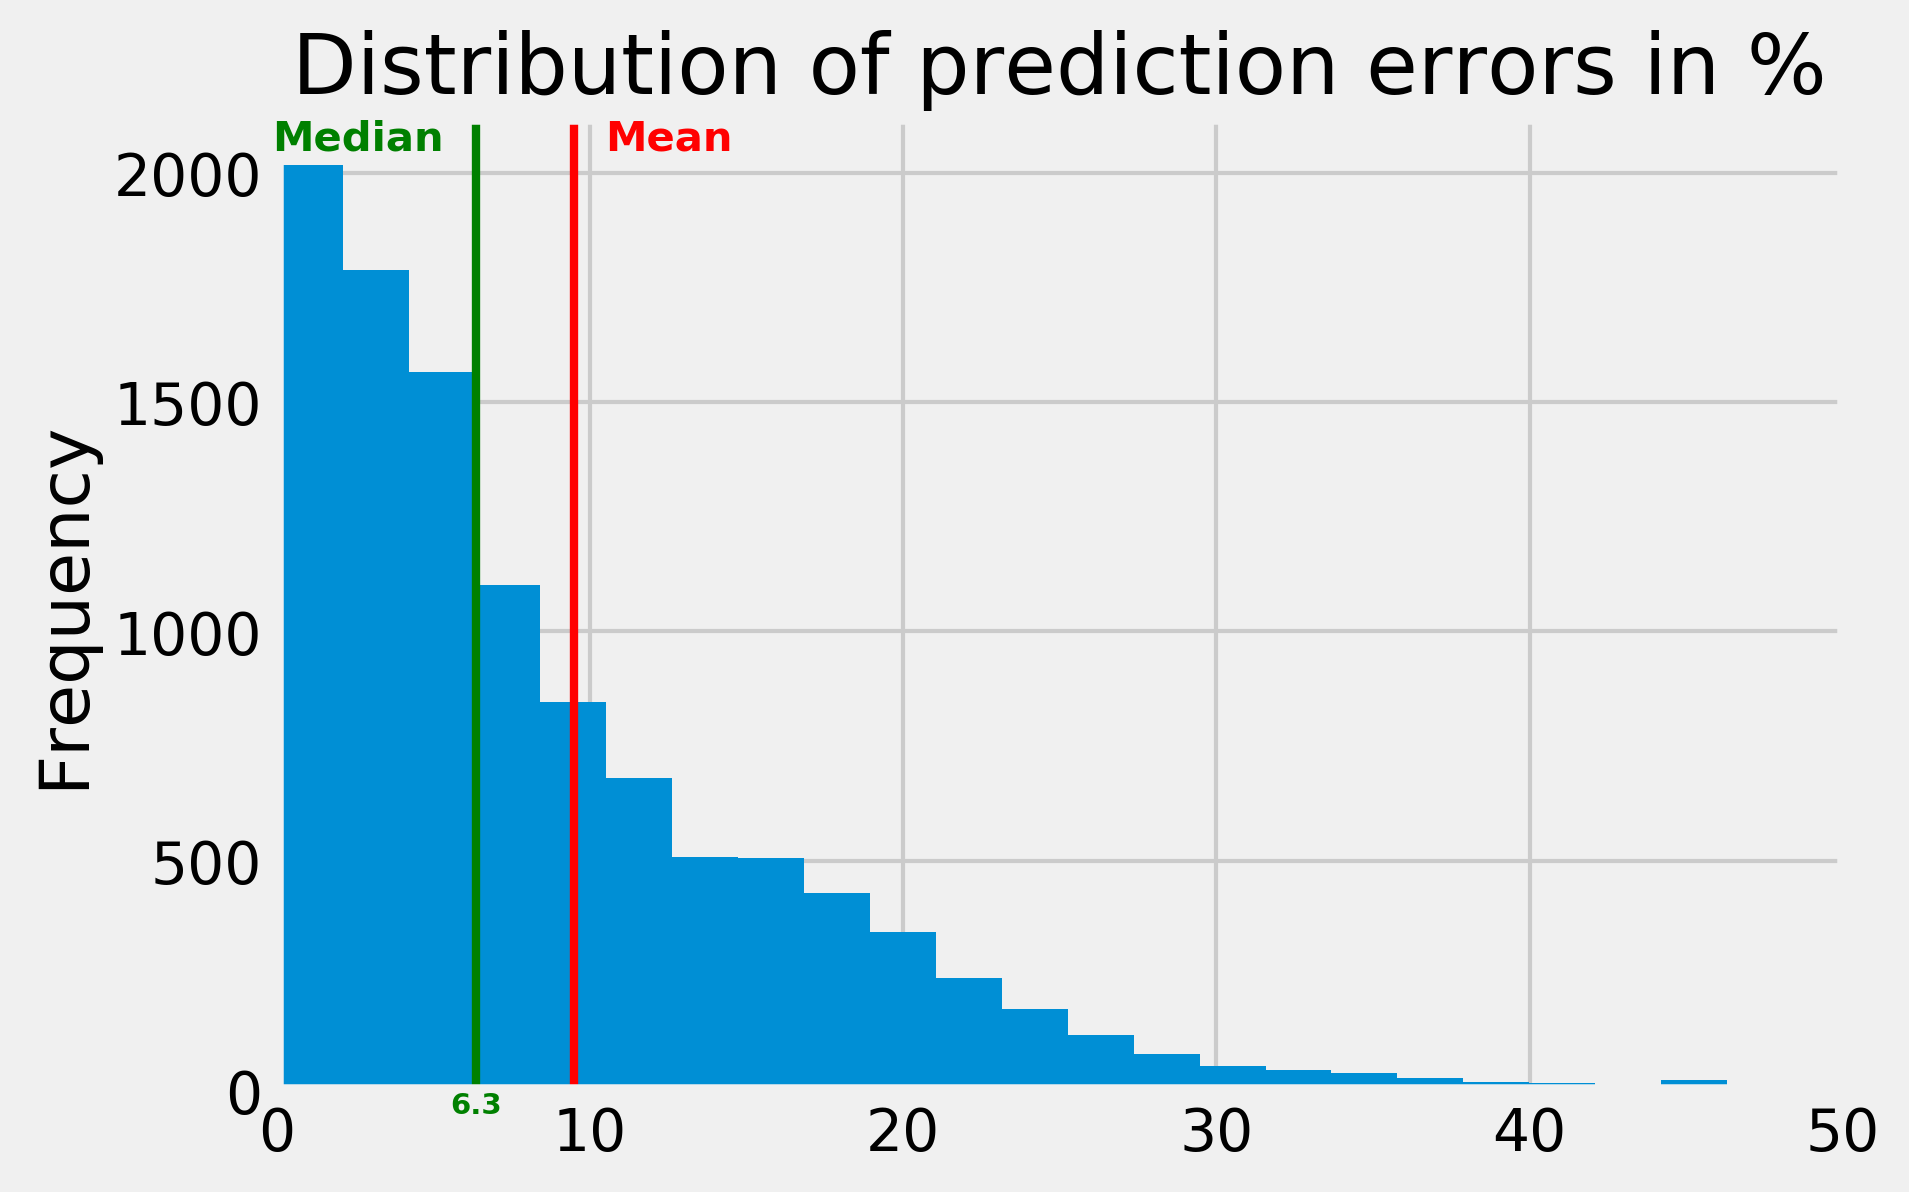

In [93]:
errors = np.abs(predictions - y_test) / y_test * 100

graph = errors.plot.hist(xlim=(0, 50), bins=150, title="Distribution of prediction errors in %")

# Mean
mean = errors.mean()
plt.axvline(mean, color="red", linewidth=2)
graph.text(x=mean + 1, y=2050, s="Mean", weight='bold', color="red", fontsize=10);    # Red "Mean" line legend

# Median
median = errors.median()
plt.axvline(median, color="green", linewidth=2)
graph.text(x=median - 6.5, y=2050, s="Median", weight='bold', color="green", fontsize=10);    # Red "Mean" line legend
graph.text(x=median - .8, y=-50, s=str(round(median, 1)), weight='bold', color="green", fontsize=7)

In [54]:
errors.describe()

count    10784.000000
mean         9.498694
std         11.327757
min          0.000895
25%          2.889948
50%          6.348438
75%         12.978475
max        315.686548
Name: price, dtype: float64

In [23]:
impossible_volume = data[(data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0)]
impossible_volume.shape[0]

3

In [30]:
models

[{'name': 'LinearRegression',
  'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  'hyperparameters': {'n_jobs': [-1]},
  'best_params': {'n_jobs': -1},
  'best_score': 0.8965089947872372,
  'best_model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)},
 {'name': 'KNeighborsRegressor',
  'estimator': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
  'hyperparameters': {'n_neighbors': [1],
   'weights': ['distance', 'uniform'],
   'algorithm': ['ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2],
   'n_jobs': [-1]},
  'best_params': {'algorithm': 'brute',
   'n_jobs': -1,
   'n_neighbors': 1,
   'p': 1,
   'weights': 'distance'},
  'best_score': 0.9555324062219607,
  'best_model': KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                      me

In [46]:
from sklearn import tree

rf = models[0]["best_model"]
# tree.plot_tree(rf[0])
# tree.plot_tree(rf.estimators_[0])

# from sklearn.tree import export_graphviz
# export_graphviz(rf.estimators_[0], out_file='tree.dot', feature_names = features,
#                 class_names = ["price"],
#                 rounded = True, proportion = False, precision = 2, filled = True)

import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'